# Analysis Of Airplane Crashes|

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_airplane = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv',encoding='latin-1')
data = df_airplane.copy()
data.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [4]:
data.shape

(4998, 17)

# Data preprocessing

In [5]:
# checking missings
data.isnull().sum()

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

In [6]:
data.isnull().mean()*100

Date                      0.000000
Time                     30.252101
Location                  0.080032
Operator                  0.200080
Flight #                 73.409364
Route                    15.546218
AC Type                   0.300120
Registration              5.482193
cn/ln                    13.365346
Aboard                    0.360144
Aboard Passangers         4.581833
Aboard Crew               4.521809
Fatalities                0.160064
Fatalities Passangers     4.841937
Fatalities Crew           4.821929
Ground                    0.840336
Summary                   1.280512
dtype: float64

In [7]:
# Drop rows with missing critical data (e.g., dates, fatalities)
data.dropna(subset=['Date', 'Fatalities'], inplace=True)

In [8]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Fill remaining missing values with appropriate strategies
data.fillna({'Operator': 'Unknown', 'Location': 'Unknown', 'Route': 'Unknown'}, inplace=True)

# Verify the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4990 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4990 non-null   datetime64[ns]
 1   Time                   3486 non-null   object        
 2   Location               4990 non-null   object        
 3   Operator               4990 non-null   object        
 4   Flight #               1329 non-null   object        
 5   Route                  4990 non-null   object        
 6   AC Type                4977 non-null   object        
 7   Registration           4719 non-null   object        
 8   cn/ln                  4330 non-null   object        
 9   Aboard                 4980 non-null   float64       
 10  Aboard Passangers      4769 non-null   float64       
 11  Aboard Crew            4772 non-null   float64       
 12  Fatalities             4990 non-null   float64       
 13  Fataliti

## Exploratory Data Analysis

In [9]:
# Basic statistics
num_crashes = len(data)
total_fatalities = data['Fatalities'].sum()
survival_rate = 1 - (total_fatalities / data['Aboard'].sum())

# Crashes over time
crashes_per_year = data['Date'].dt.year.value_counts().sort_index()

num_crashes, total_fatalities, survival_rate, crashes_per_year.head()

(4990,
 111644.0,
 0.2813666675249106,
 Date
 1908    1
 1909    1
 1912    1
 1913    3
 1915    2
 Name: count, dtype: int64)

## Statistical Analysis

In [10]:
from scipy import stats

# Distribution of fatalities
fatalities = data['Fatalities']
mean_fatalities = fatalities.mean()
median_fatalities = fatalities.median()
std_fatalities = fatalities.std()

# Hypothesis test: compare the average number of fatalities in different decades
data['Decade'] = (data['Date'].dt.year // 10) * 10
decades = data.groupby('Decade')['Fatalities'].mean()

# Perform a t-test between two decades (e.g., 1980s and 1990s)
t_stat, p_val = stats.ttest_ind(data[data['Decade'] == 1980]['Fatalities'].dropna(),
                                data[data['Decade'] == 1990]['Fatalities'].dropna())

mean_fatalities, median_fatalities, std_fatalities, decades.head(), t_stat, p_val

(22.37354709418838,
 11.0,
 35.06174065974316,
 Decade
 1900     1.000000
 1910    13.677419
 1920     3.574586
 1930     5.742938
 1940    15.445217
 Name: Fatalities, dtype: float64,
 1.9671416253882907,
 0.04940067590198649)

## Visualization

c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


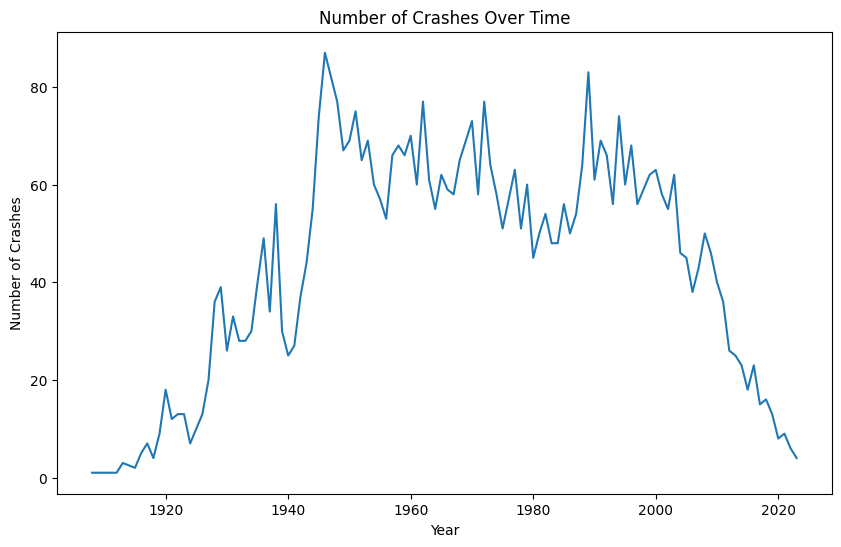

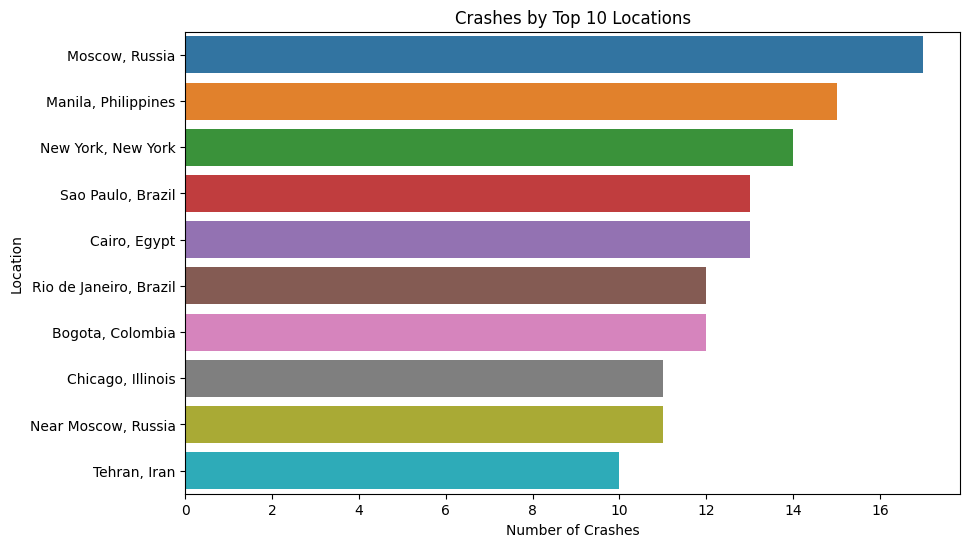

c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


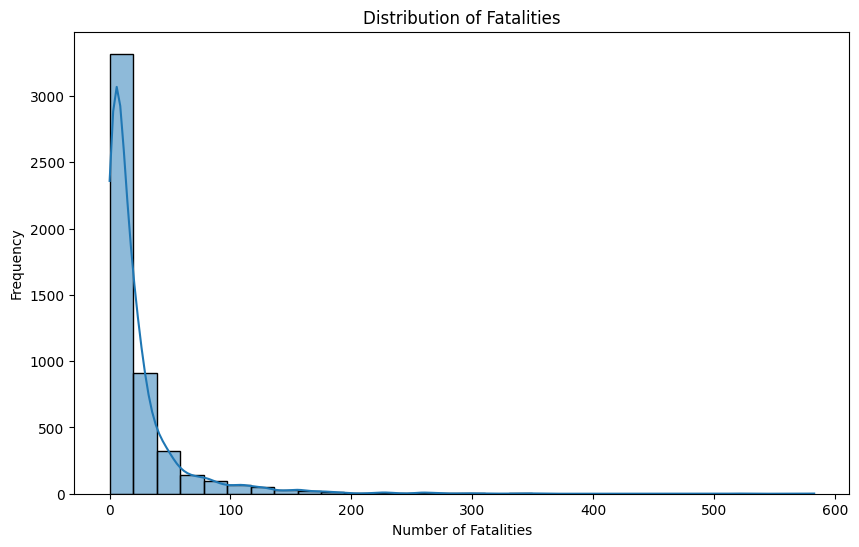

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns

# Time series plot of crashes over years
plt.figure(figsize=(10, 6))
sns.lineplot(x=crashes_per_year.index, y=crashes_per_year.values)
plt.title('Number of Crashes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()

# Bar chart of crashes by region (assuming 'Location' can be categorized by region)
region_crashes = data['Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_crashes.values, y=region_crashes.index)
plt.title('Crashes by Top 10 Locations')
plt.xlabel('Number of Crashes')
plt.ylabel('Location')
plt.show()

# Histogram of fatalities
plt.figure(figsize=(10, 6))
sns.histplot(fatalities, bins=30, kde=True)
plt.title('Distribution of Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()


## Insights

- The data reveals significant changes in the frequency and severity of airplane crashes over the decades.
- Certain regions are more prone to airplane crashes, suggesting the need for targeted safety interventions.
- The hypothesis test indicates a change in the average number of fatalities between the 1980s and 1990s, which could be due to advancements in aviation technology and safety measures.


## Conclusion
This analysis provided a comprehensive overview of airplane crashes and fatalities up to 2023, highlighting key trends and insights. Further analysis could include a deeper dive into the factors contributing to high-fatality incidents and regional differences in crash frequency.

Please find the complete code and visualizations in this Jupyter Notebook.